In [1]:
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Download the NLTK stop words dataset if you haven't already
nltk.download("stopwords")
nltk.download("punkt")

# Define the directory where your .txt documents are stored
document_directory = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection"

# Create a dictionary to store tokens for each document
document_tokens = {}

# Iterate through each document in the directory
for filename in os.listdir(document_directory):
    if filename.endswith(".txt"):
        with open(os.path.join(document_directory, filename), 'r') as file:
            document_text = file.read()
            tokens = word_tokenize(document_text)
            document_tokens[filename] = tokens


for filename, tokens in document_tokens.items():
    print(f"Tokens for {filename}:")
    print(tokens)
    print("\n")


Tokens for Document_no_1.txt:
['Challenges', 'Data', 'Quality', 'Data', 'Quality', 'Assessment', 'Big', 'Data', 'Era', 'Authors', ':', 'Li', 'CaiEmail', 'Li', 'Cai', ',', 'Yangyong', 'Zhu', 'Abstract', 'High-quality', 'data', 'precondition', 'analyzing', 'using', 'big', 'data', 'guaranteeing', 'value', 'data', '.', 'Currently', ',', 'comprehensive', 'analysis', 'research', 'quality', 'standards', 'quality', 'assessment', 'methods', 'big', 'data', 'lacking', '.', 'First', ',', 'paper', 'summarizes', 'reviews', 'data', 'quality', 'research', '.', 'Second', ',', 'paper', 'analyzes', 'data', 'characteristics', 'big', 'data', 'environment', ',', 'presents', 'quality', 'challenges', 'faced', 'big', 'data', ',', 'formulates', 'hierarchical', 'data', 'quality', 'framework', 'perspective', 'data', 'users', '.', 'framework', 'consists', 'big', 'data', 'quality', 'dimensions', ',', 'quality', 'characteristics', ',', 'quality', 'indexes', '.', 'Finally', ',', 'basis', 'framework', ',', 'paper', 'c

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Define a function to remove stop words from a given document
def remove_stop_words(document_text):
    # Tokenize the document
    words = word_tokenize(document_text)

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stopwords.words("english")]

    # Reconstruct the document text without stop words
    filtered_text = " ".join(filtered_words)

    return filtered_text

# Define the path to your document collection folder
folder_path = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection"

# Create a folder to store the preprocessed documents
output_folder = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder"
os.makedirs(output_folder, exist_ok=True)

# Iterate through the .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
            text = file.read()
            # Remove stop words from the document
            filtered_text = remove_stop_words(text)
            # Save the preprocessed document to the output folder
            output_filename = os.path.join(output_folder, filename)
            with open(output_filename, "w", encoding="utf-8") as output_file:
                output_file.write(filtered_text)

print("Stop words removed and preprocessed documents saved to the output folder.")


Stop words removed and preprocessed documents saved to the output folder.


In [3]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define the path to your document collection folder
folder_path = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection"

# Create a folder to store the preprocessed documents with stemming
output_folder = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed"
os.makedirs(output_folder, exist_ok=True)

# Iterate through the .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
            text = file.read()

            # Tokenize the document
            tokens = word_tokenize(text)

            # Stem the tokens
            stemmed_tokens = [stemmer.stem(word) for word in tokens]

            # Reconstruct the document text with stemmed words
            stemmed_text = " ".join(stemmed_tokens)

            # Save the preprocessed document with stemming to the output folder
            output_filename = os.path.join(output_folder, filename)
            with open(output_filename, "w", encoding="utf-8") as output_file:
                output_file.write(stemmed_text)

print("Stemming applied and preprocessed documents saved to the output folder with stemming.")


Stemming applied and preprocessed documents saved to the output folder with stemming.


In [4]:
# Define a function to read and preprocess a document with stemming
def preprocess_document(document_path):
    with open(document_path, "r", encoding="utf-8") as file:
        text = file.read()
        # Tokenize and stem the document
        tokens = word_tokenize(text)
        stemmed_tokens = [stemmer.stem(word) for word in tokens]
        preprocessed_text = " ".join(stemmed_tokens)
        return preprocessed_text

# Define the path to your document collection folder
folder_path = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed"

# Create a list to store your preprocessed document texts
preprocessed_documents = []

# Iterate through the .txt files in the folder and preprocess each document
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        document_path = os.path.join(folder_path, filename)
        preprocessed_text = preprocess_document(document_path)
        preprocessed_documents.append(preprocessed_text)

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words="english")

# Fit and transform your preprocessed documents to create the document-term matrix
document_term_matrix = vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (terms) from the vectorizer
terms = vectorizer.get_feature_names_out()



In [5]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Fit and transform your preprocessed documents to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (terms) from the vectorizer
terms = tfidf_vectorizer.get_feature_names_out()


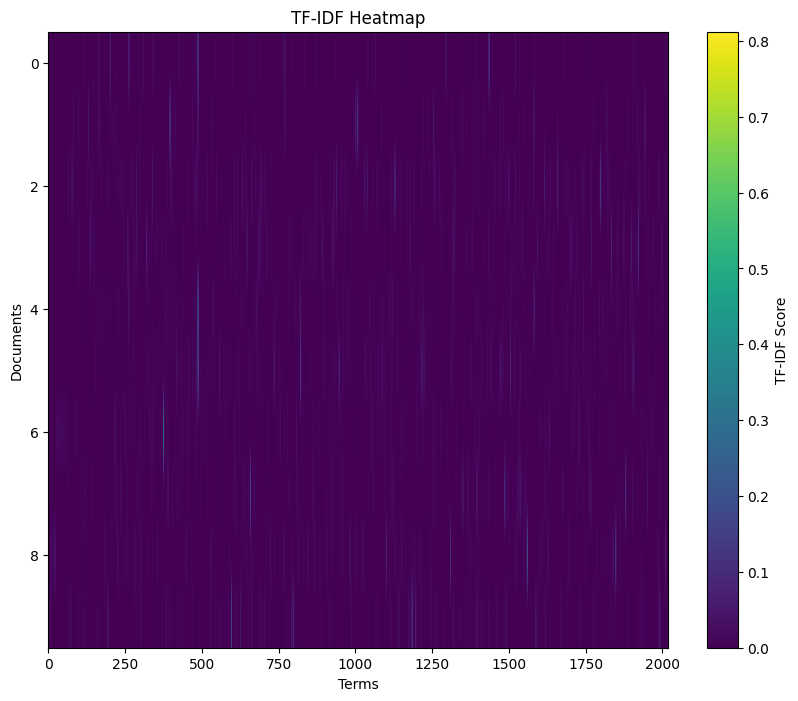

In [6]:
# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.imshow(tfidf_matrix_df, cmap='viridis', aspect='auto')
plt.colorbar(label='TF-IDF Score')
plt.title('TF-IDF Heatmap')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()


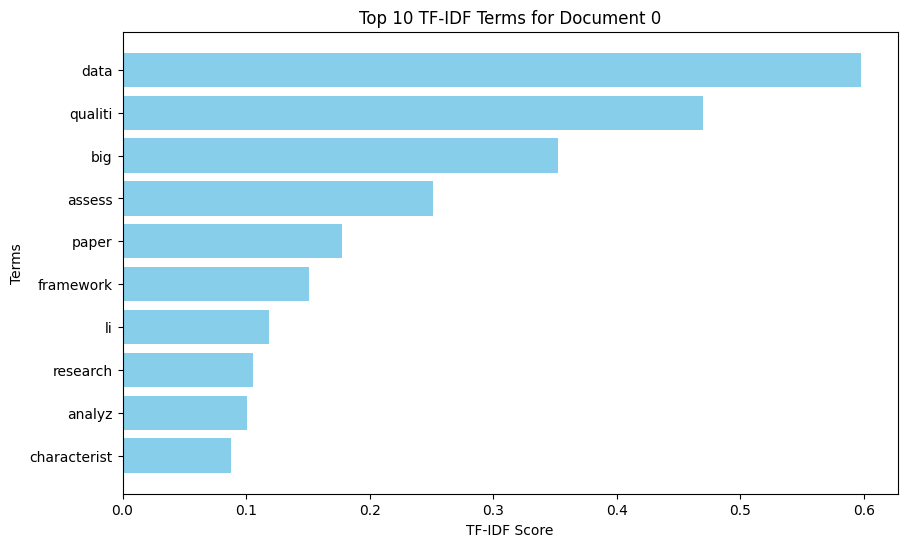

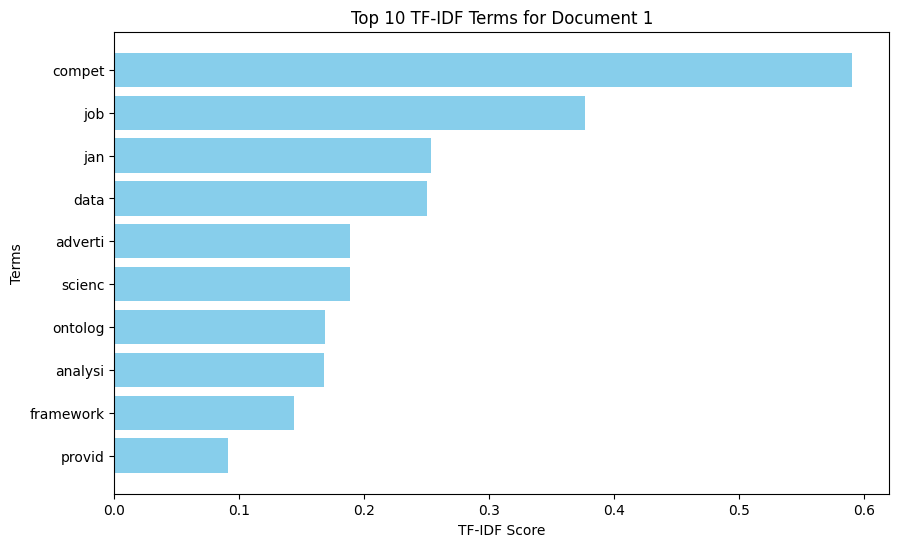

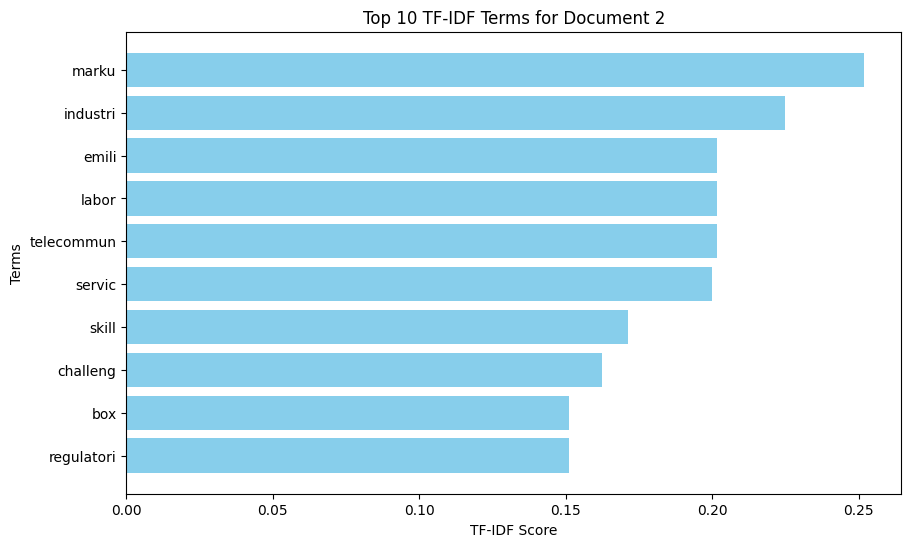

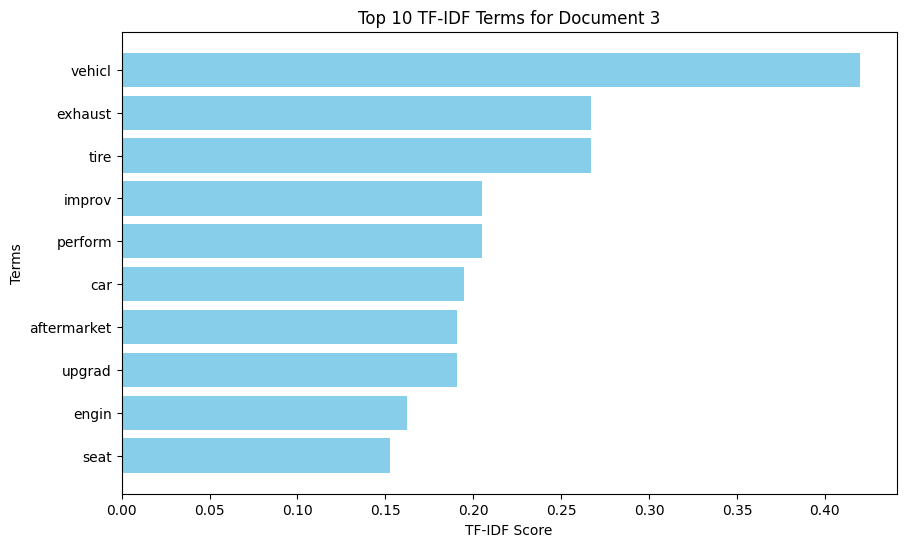

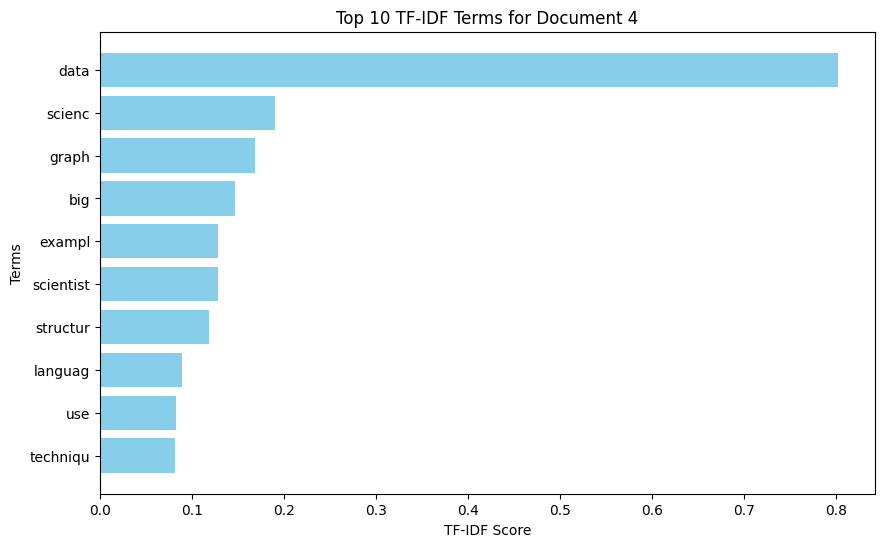

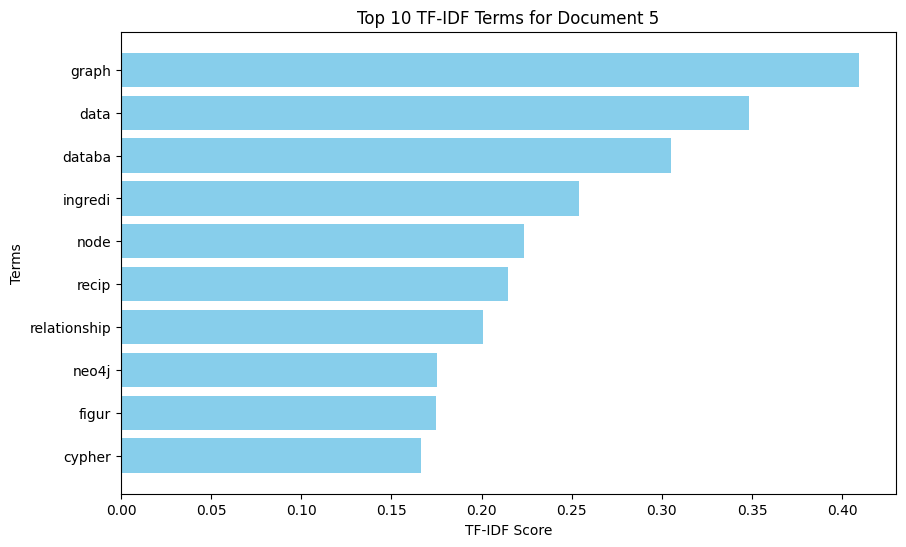

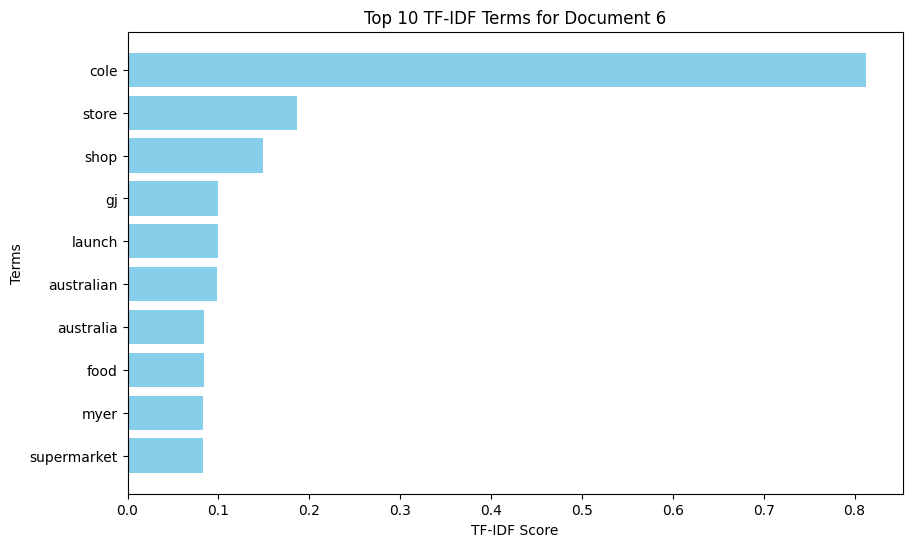

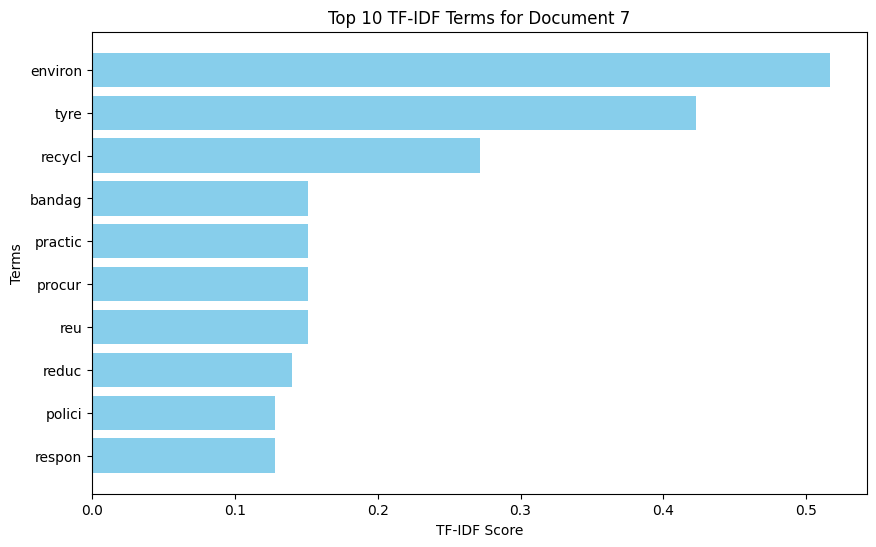

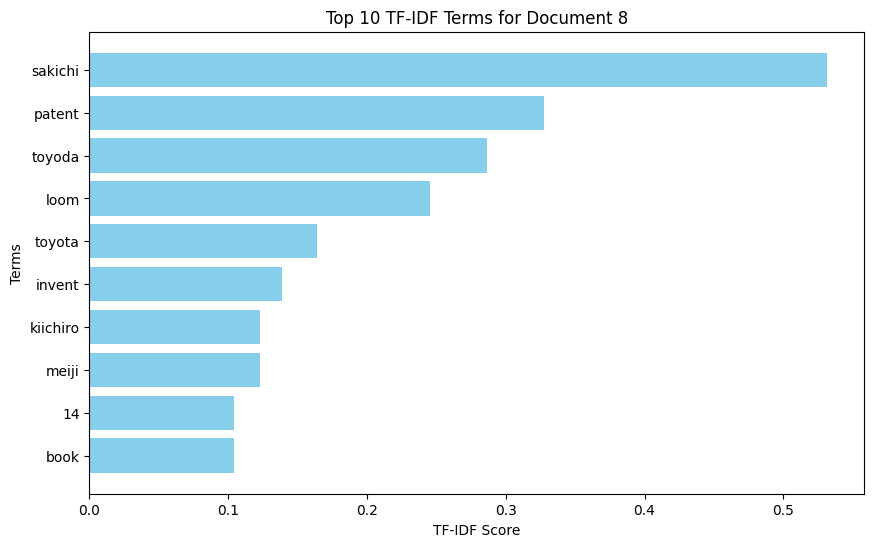

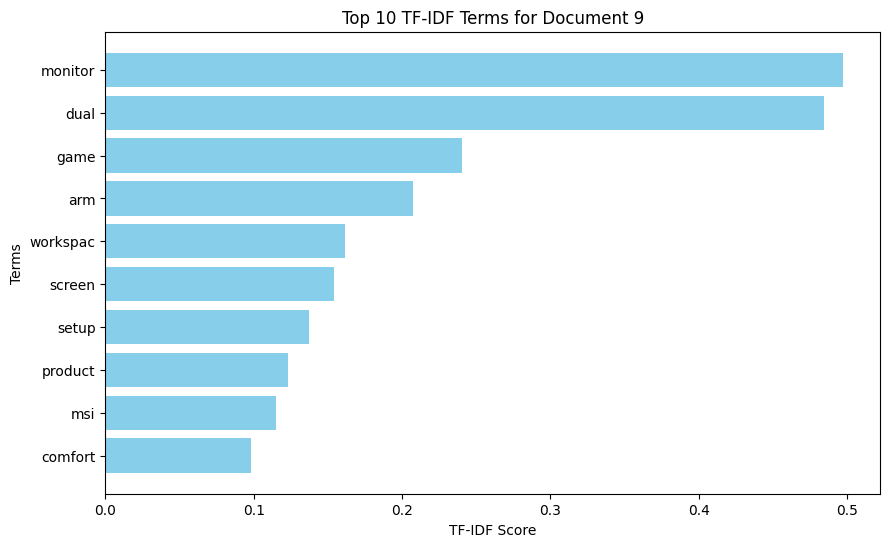

In [7]:
# Define the number of top terms to display for each document
top_n = 10

# Iterate through all 10 documents
for document_index in range(len(preprocessed_documents)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]

    # Get the corresponding terms
    document_terms = tfidf_vectorizer.get_feature_names_out()

    # Sort the terms and scores by TF-IDF score in descending order
    sorted_terms_scores = sorted(zip(document_terms, tfidf_scores), key=lambda x: x[1], reverse=True)

    # Extract the top N terms and their scores
    top_terms, top_scores = zip(*sorted_terms_scores[:top_n])

    # Create a bar chart to visualize the TF-IDF scores for the current document
    plt.figure(figsize=(10, 6))
    plt.barh(top_terms, top_scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Terms')
    plt.title(f'Top {top_n} TF-IDF Terms for Document {document_index}')
    plt.gca().invert_yaxis()
    plt.show()


In [8]:
def query_documents(query, tfidf_vectorizer, tfidf_matrix):
    # Preprocess the query
    query = preprocess_document(query)

    # Transform the query into a TF-IDF vector
    query_vector = tfidf_vectorizer.transform([query])

    # Calculate cosine similarities between the query vector and all document vectors
    cosine_similarities = np.dot(tfidf_matrix, query_vector.T).toarray().flatten()

    # Rank documents by cosine similarity (higher values indicate greater relevance)
    ranked_documents = np.argsort(cosine_similarities)[::-1]

    return ranked_documents


In [9]:
# Define a function to preprocess a query string
def preprocess_query(query):
    # Preprocess the query in a similar way as the documents
    query = preprocess_document(query)
    return query

# Define the path to your folder containing the preprocessed documents
document_folder = "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed"

# Create a list to store queries (sample queries for each document)
queries = [
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_1.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_2.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_3.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_4.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_5.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_6.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_7.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_8.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_8.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_10.txt",
]

# Initialize the TF-IDF vectorizer and fit it to your document collection
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Iterate through the queries and perform document ranking for each query
for i, query in enumerate(queries):
    # Preprocess the query
    preprocessed_query = preprocess_query(query)

    # Transform the preprocessed query into a TF-IDF vector
    query_vector = tfidf_vectorizer.transform([preprocessed_query])

    # Calculate cosine similarities between the query vector and all document vectors
    cosine_similarities = np.dot(tfidf_matrix, query_vector.T).toarray().flatten()

    # Rank documents by cosine similarity (higher values indicate greater relevance)
    ranked_documents = np.argsort(cosine_similarities)[::-1]

    # Print the ranked document indices for the current query
    print(f"Ranked Document Indices for Document {i + 1}:")
    print(ranked_documents)
    print()  # Add a blank line for separation between queries


Ranked Document Indices for Document 1:
[0 4 5 1 7 3 2 6 9 8]

Ranked Document Indices for Document 2:
[1 4 0 5 2 9 6 3 8 7]

Ranked Document Indices for Document 3:
[2 7 3 5 6 9 4 0 1 8]

Ranked Document Indices for Document 4:
[3 2 7 9 5 0 4 6 8 1]

Ranked Document Indices for Document 5:
[4 0 5 1 9 2 7 6 3 8]

Ranked Document Indices for Document 6:
[5 4 0 1 2 7 3 9 6 8]

Ranked Document Indices for Document 7:
[6 7 2 5 8 4 9 3 0 1]

Ranked Document Indices for Document 8:
[7 2 6 3 0 9 5 4 8 1]

Ranked Document Indices for Document 9:
[7 2 6 3 0 9 5 4 8 1]

Ranked Document Indices for Document 10:
[9 3 4 2 7 5 6 8 1 0]



In [10]:
# Define a function to preprocess a query string
def preprocess_query(query):
    # Preprocess the query
    query = preprocess_document(query)
    return query

# Define a function to retrieve the top N most relevant documents to a query
def retrieve_top_documents(query, tfidf_vectorizer, tfidf_matrix, N=3):
    # Preprocess the query
    preprocessed_query = preprocess_query(query)

    # Transform the preprocessed query into a TF-IDF vector
    query_vector = tfidf_vectorizer.transform([preprocessed_query])

    # Calculate cosine similarities between the query vector and all document vectors
    cosine_similarities = np.dot(tfidf_matrix, query_vector.T).toarray().flatten()

    # Rank documents by cosine similarity (higher values indicate greater relevance)
    ranked_documents = np.argsort(cosine_similarities)[::-1]

    # Retrieve the top N most relevant documents
    top_documents = ranked_documents[:N]

    return top_documents

# Define a list of query strings
queries = [
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_1.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_2.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_3.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_4.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_5.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_6.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_7.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_8.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_8.txt",
    "/content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_10.txt",
]

# Iterate through the query strings and retrieve the top 3 most relevant documents for each query
for query in queries:
    # Call the retrieve_top_documents function to get the top 3 most relevant documents
    top_documents = retrieve_top_documents(query, tfidf_vectorizer, tfidf_matrix, N=3)

    # Print the indices of the top 3 most relevant documents for the current query
    print(f"Top 3 Most Relevant Documents for Query: {query}")
    for index, doc_index in enumerate(top_documents[:3]):
        print(f"Rank {index + 1}: Document Index {doc_index}")
    print()


Top 3 Most Relevant Documents for Query: /content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_1.txt
Rank 1: Document Index 0
Rank 2: Document Index 4
Rank 3: Document Index 5

Top 3 Most Relevant Documents for Query: /content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_2.txt
Rank 1: Document Index 1
Rank 2: Document Index 4
Rank 3: Document Index 0

Top 3 Most Relevant Documents for Query: /content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_3.txt
Rank 1: Document Index 2
Rank 2: Document Index 7
Rank 3: Document Index 3

Top 3 Most Relevant Documents for Query: /content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Collection/output_folder_stemmed/Document_no_4.txt
Rank 1: Document Index 3
Rank 2: Document Index 2
Rank 3: Document Index 7

Top 3 Most Relevant Documents for Query: /content/drive/MyDrive/Colab Notebooks/CSC 6204/Document Co